In [14]:
from simple_exact_diagonalization_routines.local_matrix_class import *
from scipy.linalg import expm
import matplotlib.pyplot as plt
import numpy as np
from qutip import *

In [15]:
# System size
L = 3

# Create objects of Pauli operators
X = X_class(L)
Y = Y_class(L)
Z = Z_class(L)

# Not used
S_plus = S_plus_class(L)
S_minus = S_minus_class(L)

# Trivial initialization of the right size matrix
H_TFIM = 0*np.eye( 2**L ) 

# H = X1X2 + X2X3 + Z1 + Z2 + Z3
for x in range(L-1):
    H_TFIM = H_TFIM + X.at(x+1).dot(X.at(x+2)) + Z.at(x+1)
H_TFIM = H_TFIM + Z.at(L)    
hamiltonian_name = "TFIM_L_" +str(L)   

In [16]:
from class_double_bracket_flow import *

# Initialize class with Hamiltonian
flow = double_bracket_flow( H_TFIM )

flow.flow_generator['type'] = 'magnetic_field'
flow.flow_generator['field_vector'] = np.asarray([1,1,1])

# Debugging tests

## Test 1: Flow generator commutation
flow.choose_flow_generator()returns [B,H]. Correct.

In [8]:
# Helper functions for testing
pauli = {
    0: qeye(2),
    1: sigmax(),
    2: sigmay(),
    3: sigmaz()
         }

def tensor_out(tup):
    return tensor(pauli[tup[0]],pauli[tup[1]],pauli[tup[2]])

In [9]:
B = 2*tensor_out((3,0,0)) + tensor_out((0,3,0)) + tensor_out((0,0,3))
H = tensor_out((1,1,0)) + tensor_out((0,1,1)) + B

commutator(B,H)
# print(B)

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = False
Qobj data =
[[ 0.  0.  0.  4.  0.  0.  6.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  6.]
 [ 0.  0.  0.  0.  2.  0.  0.  0.]
 [-4.  0.  0.  0.  0.  2.  0.  0.]
 [ 0.  0. -2.  0.  0.  0.  0.  4.]
 [ 0.  0.  0. -2.  0.  0.  0.  0.]
 [-6.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -6.  0.  0. -4.  0.  0.  0.]]

In [10]:
flow.flow_generator['field_vector'] = [2,1,1]
Z = Z_class(flow.L)
Z_ls = [Z.at(i+1) for i in range(flow.L)]
## ?? The numpy way?
B_field = sum([flow.flow_generator['field_vector'][i] * Z_ls[i] for i in range (flow.L)])
chosen_generator = double_bracket_flow.commutator( B_field, H_TFIM ) 
print(chosen_generator)
# print(B_field)

[[ 0.  0.  0.  4.  0.  0.  6.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  6.]
 [ 0.  0.  0.  0.  2.  0.  0.  0.]
 [-4.  0.  0.  0.  0.  2.  0.  0.]
 [ 0.  0. -2.  0.  0.  0.  0.  4.]
 [ 0.  0.  0. -2.  0.  0.  0.  0.]
 [-6.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -6.  0.  0. -4.  0.  0.  0.]]


## Test 2: Gradient

In [11]:
# Issue 1: gradient changing when running multiple times
dB_custom = 0.001
print(flow.find_magnetic_gradient(s=0.1, B=[3,1,1], dB = dB_custom))
print(flow.find_magnetic_gradient(s=0.1, B=[1,1,1], dB = dB_custom))

[ 0.40170079 -0.36461885 -0.84005332]
[-0.40759315  0.81715093 -0.40759315]


## Test 3: Flow sigma decreasing

In [17]:
flow.please_be_exhaustively_verbose = False
flow.please_be_verbose = True
flow.flow_generator['type'] = 'magnetic_field'
flow.flow_generator['field_vector'] = np.asarray([1,2,1])
flow.nmb_flow_steps = 5
flow.magnetic_step_min = 0
flow.magnetic_step_max = 1
flow.nmb_search_points_magnetic_b_search = 9

flow.flow_step_min = 0
flow.flow_step_max = 1.0
flow.nmb_search_points_minimizing_s_search = 15
flow.flow_via_magnetic_field_search()

Flow step  0 using H with norm 6.324555320336759
    Found minimum norm =  2.885555594802627  for s =  0.07142857142857142
Flow step  1 using H with norm 6.324555320336759
Flowing with gradient [ 0.57803767 -0.575973    0.57803767]
 db = 0.0 , B = [0.40824829 0.81649658 0.40824829]
    Found minimum norm =  2.885555594802627  for s =  0.07142857142857142
 db = 0.125 , B = [0.33599358 0.88849321 0.33599358]
    Found minimum norm =  2.866076107461075  for s =  0.07142857142857142
 db = 0.25 , B = [0.26373887 0.96048983 0.26373887]
    Found minimum norm =  2.850739706872764  for s =  0.07142857142857142
 db = 0.375 , B = [0.19148416 1.03248646 0.19148416]
    Found minimum norm =  2.8419952414750047  for s =  0.07142857142857142
 db = 0.5 , B = [0.11922945 1.10448308 0.11922945]
    Found minimum norm =  2.8417456093284628  for s =  0.07142857142857142
 db = 0.625 , B = [0.04697475 1.17647971 0.04697475]
    Found minimum norm =  2.8506295716315813  for s =  0.07142857142857142
 db = 0.

## Test 4: Plotting

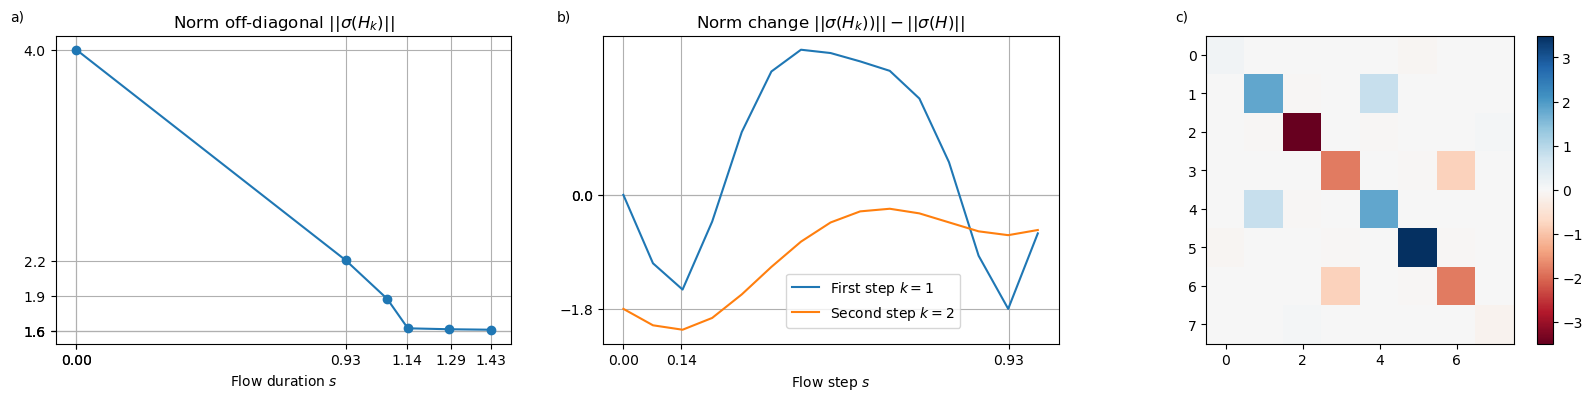

In [18]:
flow.show_flow_forwards_results()
# flow.initialize_flow_results()

# TLFIM
Compare with Fig 4 notebook

TODOs:

[] Time

[] Change initial directions (how to make a good guess?)

[] Store values and plot

In [ ]:
# System size
L = 3

# Create objects of Pauli operators
X = X_class(L)
Y = Y_class(L)
Z = Z_class(L)
S_plus = S_plus_class(L)
S_minus = S_minus_class(L)

# Trivial initialization of the right size matrix
hamiltonian_name = "TLFIM_L_" +str(L)
H_TLFIM = 0*np.eye( 2**L ) 

# 2X1X2 + 2X2X3 + Z1 + X1 + Z2 + X2
for x in range(L-1):
    H_TLFIM = H_TLFIM + 2*X.at(x+1).dot(X.at(x+2)) + Z.at(x+1)+ X.at(x+1)
H_TLFIM = H_TLFIM + Z.at(L)    + X.at(L) 
    

In [ ]:
from class_double_bracket_flow import *


flow = double_bracket_flow( H_TLFIM )

flow.please_be_exhaustively_verbose = False
flow.please_be_verbose = True

flow.flow_step_max = 0.2
flow.nmb_search_points_minimizing_s_search = 10
flow.please_use_binary_search =  False
flow.please_compute_observables = False


flow.flow_generator['type'] = 'magnetic_field'
flow.flow_generator['field_vector'] = np.asarray([1,1,5])

flow.magnetic_step_min = 0
flow.magnetic_step_max = 0.1
flow.nmb_search_points_magnetic_b_search = 10
flow.nmb_flow_steps = 5

flow.flow_via_magnetic_field_search()

Flow step  0 using H with norm 10.583005244258363
    Found minimum norm =  7.355399891293181  for s =  0.08888888888888889
Flow step  1 using H with norm 10.583005244258363
Flowing with gradient [-0.9804507  -0.00329998  0.1967372 ]
 db = 0.0 , B = [0.19245009 0.19245009 0.96225045]
    Found minimum norm =  7.355399891293181  for s =  0.08888888888888889
 db = 0.011111111111111112 , B = [0.20334399 0.19248676 0.96006448]
    Found minimum norm =  7.334834544758569  for s =  0.08888888888888889
 db = 0.022222222222222223 , B = [0.21423788 0.19252342 0.95787851]
    Found minimum norm =  7.314251276495669  for s =  0.08888888888888889
 db = 0.03333333333333333 , B = [0.22513178 0.19256009 0.95569254]
    Found minimum norm =  7.293670039262234  for s =  0.08888888888888889
 db = 0.044444444444444446 , B = [0.23602568 0.19259676 0.95350657]
    Found minimum norm =  7.273111060818701  for s =  0.08888888888888889
 db = 0.05555555555555556 , B = [0.24691957 0.19263342 0.9513206 ]
    Fou